-----------------------

# **3) Importação da bibliotecas necessárias e carregamento do dataset**

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 2. Carregar dados
url = '/content/dados_tratados_V2.csv'  # Use barra simples
data = pd.read_csv(url, sep = ';')


-----------------------

# **5) Criação de modelos preditivos**

## **5.1) Random Forest desconsiderando o desbalanceamentos das classes**


In [ ]:
# Verificar valores únicos na coluna 'Music effects'
print("Valores únicos antes da limpeza:", data['Music effects'].unique())

Valores únicos antes da limpeza: ['No effect' 'Improve' 'Worsen']


In [ ]:
# Remover registros com valores ausentes na coluna 'Music effects'
data_clean = data.dropna(subset=['Music effects'])

In [ ]:
# Codificar a variável alvo incluindo 'Worsen'
data_clean['Music effects'] = data_clean['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})

In [ ]:
# Verificar os valores únicos após o mapeamento
print("Valores únicos após mapeamento:", data_clean['Music effects'].unique())

Valores únicos após mapeamento: [ 0  1 -1]


In [ ]:
# Separar variáveis independentes e dependentes
X = data_clean[style_columns]
y = data_clean['Music effects']

In [ ]:
# Verificar se ainda há NaNs em y após codificação
print(f'Valores ausentes em y: {y.isnull().sum()}')

Valores ausentes em y: 0


In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Modelagem
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  3]
 [ 0  0 27]
 [ 0  4 89]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.00      0.00      0.00        27
           1       0.75      0.96      0.84        93

    accuracy                           0.72       123
   macro avg       0.25      0.32      0.28       123
weighted avg       0.57      0.72      0.63       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **5.2) Random Forest com Undersampling**
###Undersampling é uma técnica de balanceamento de classes que reduz o número de exemplos na classe majoritária. Isso é feito removendo aleatoriamente exemplos até que a proporção entre as classes esteja equilibrada. Embora simples, pode levar à perda de informações valiosas se muitos exemplos forem removidos.

<img src="https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png" width="90%"/>

[Fonte da imagem](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t1)

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# 2. Carregar dados
url = '/content/dados_tratados_V2.csv'  # Use barra simples
data = pd.read_csv(url, sep = ';')

In [ ]:
# Verificar valores únicos na coluna 'Music effects'
print("Valores únicos antes da limpeza:", data['Music effects'].unique())

Valores únicos antes da limpeza: ['No effect' 'Improve' 'Worsen']


In [ ]:
# Remover registros com valores ausentes na coluna 'Music effects'
data_clean = data.dropna(subset=['Music effects'])

In [ ]:
# Codificar a variável alvo incluindo 'Worsen'
data_clean['Music effects'] = data_clean['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})


In [ ]:
# Verificar os valores únicos após o mapeamento
print("Valores únicos após mapeamento:", data_clean['Music effects'].unique())


Valores únicos após mapeamento: [ 0  1 -1]


In [ ]:
# Separar variáveis independentes e dependentes
X = data_clean[style_columns]
y = data_clean['Music effects']

In [ ]:
# Verificar se ainda há NaNs em y após codificação
print(f'Valores ausentes em y: {y.isnull().sum()}')

Valores ausentes em y: 0


In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


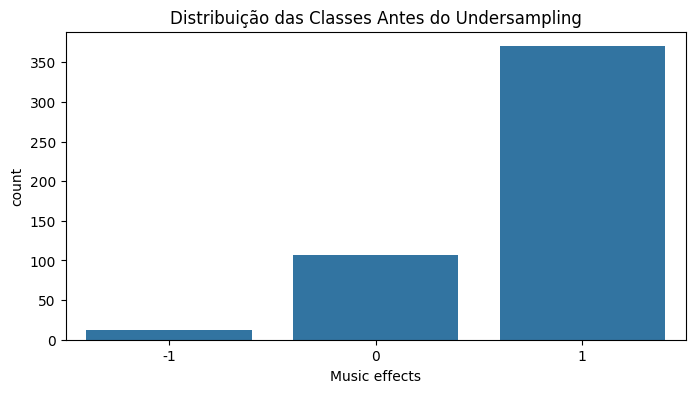

In [ ]:
# Visualização do balanço das classes antes do undersampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title('Distribuição das Classes Antes do Undersampling')
plt.show()

In [ ]:
# Aplicar undersampling no conjunto de treino
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)


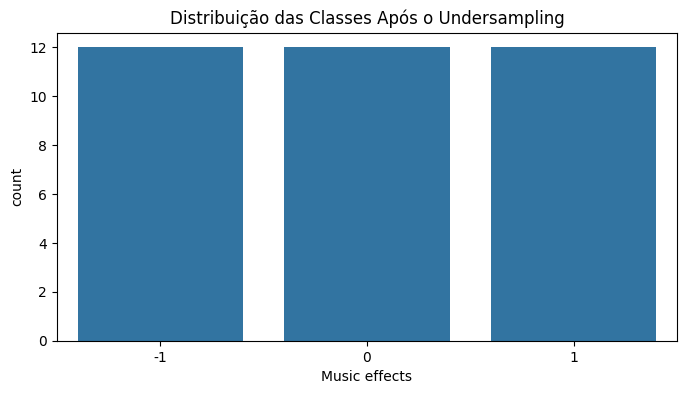

In [ ]:
# Visualização do balanço das classes após o undersampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribuição das Classes Após o Undersampling')
plt.show()

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# Modelagem
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  3]
 [ 5  6 16]
 [41 17 35]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.26      0.22      0.24        27
           1       0.65      0.38      0.48        93

    accuracy                           0.33       123
   macro avg       0.30      0.20      0.24       123
weighted avg       0.55      0.33      0.41       123



## **5.3) Random Forest com Oversampling**
###Oversampling é uma técnica que aumenta o número de exemplos nas classes minoritárias duplicando-os aleatoriamente ou gerando novas instâncias a partir dos existentes. Isso ajuda a equilibrar a proporção de classes, mas pode levar ao overfitting se não for feito cuidadosamente.

<img src="https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png" width="90%"/>

[Fonte da imagem](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t1)

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# 2. Carregar dados
url = '/content/dados_tratados_V2.csv'  # Use barra simples
data = pd.read_csv(url, sep = ';')

In [ ]:
# Verificar valores únicos na coluna 'Music effects'
print("Valores únicos antes da limpeza:", data['Music effects'].unique())

Valores únicos antes da limpeza: ['No effect' 'Improve' 'Worsen']


In [ ]:
# Remover registros com valores ausentes na coluna 'Music effects'
data_clean = data.dropna(subset=['Music effects'])

In [ ]:
# Codificar a variável alvo incluindo 'Worsen'
data_clean['Music effects'] = data_clean['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})

In [ ]:
# Verificar os valores únicos após o mapeamento
print("Valores únicos após mapeamento:", data_clean['Music effects'].unique())

Valores únicos após mapeamento: [ 0  1 -1]


In [ ]:
# Separar variáveis independentes e dependentes
X = data_clean[style_columns]
y = data_clean['Music effects']

In [ ]:
# Verificar se ainda há NaNs em y após codificação
print(f'Valores ausentes em y: {y.isnull().sum()}')

Valores ausentes em y: 0


In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

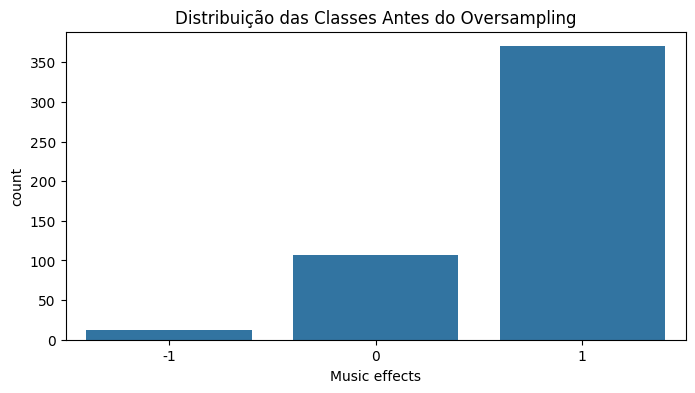

In [ ]:
# Visualização do balanço das classes antes do oversampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title('Distribuição das Classes Antes do Oversampling')
plt.show()

In [ ]:
# Aplicar oversampling no conjunto de treino
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

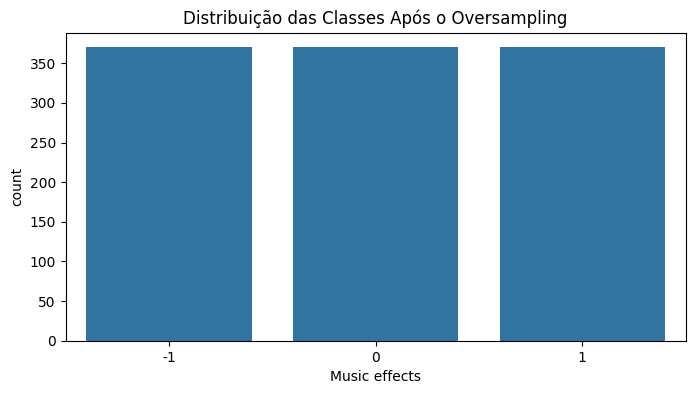

In [ ]:
# Visualização do balanço das classes após o oversampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribuição das Classes Após o Oversampling')
plt.show()

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# Modelagem
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  3]
 [ 0  1 26]
 [ 1  7 85]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.12      0.04      0.06        27
           1       0.75      0.91      0.82        93

    accuracy                           0.70       123
   macro avg       0.29      0.32      0.29       123
weighted avg       0.59      0.70      0.63       123



## **5.4) XGBoost**

<img src="https://h2o.ai/blog/2018/new-features-h2o-3-18/_jcr_content/root/section/par/advancedcolumncontrol/columns1/image_0.coreimg.png/1693338482165/xgboost-narrow.png
" width="30%"/>


###XGBoost é um poderoso algoritmo de boosting que pode lidar com dados desbalanceados através do ajuste de hiperparâmetros como scale_pos_weight, que ajusta a importância das classes minoritárias. Ele constrói modelos sequencialmente, corrigindo erros de modelos anteriores, e é conhecido por sua eficiência e precisão em problemas complexos.

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [ ]:
# 2. Carregar dados
url = '/content/dados_tratados_V2.csv'  # Use barra simples
data = pd.read_csv(url, sep = ';')

In [ ]:
# Verificar valores únicos na coluna 'Music effects'
print("Valores únicos antes da limpeza:", data['Music effects'].unique())

Valores únicos antes da limpeza: ['No effect' 'Improve' 'Worsen']


In [ ]:
# Remover registros com valores ausentes na coluna 'Music effects'
data_clean = data.dropna(subset=['Music effects'])


In [ ]:
# Codificar a variável alvo com valores positivos
data_clean['Music effects'] = data_clean['Music effects'].map({'Improve': 2, 'No effect': 1, 'Worsen': 0})

In [ ]:
# Verificar os valores únicos após o mapeamento
print("Valores únicos após mapeamento:", data_clean['Music effects'].unique())



Valores únicos após mapeamento: [1 2 0]


In [ ]:
# Separar variáveis independentes e dependentes
style_columns = [col for col in data.columns if 'frequency' in col]
X = data_clean[style_columns]
y = data_clean['Music effects']

In [ ]:
# Verificar se ainda há NaNs em y após codificação
print(f'Valores ausentes em y: {y.isnull().sum()}')

Valores ausentes em y: 0


In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Ajustar hiperparâmetros do XGBoost
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    scale_pos_weight=2,
    max_depth=5,
    n_estimators=200,
    learning_rate=0.1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:38:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  3]
 [ 0  1 26]
 [ 1  7 85]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.12      0.04      0.06        27
           2       0.75      0.91      0.82        93

    accuracy                           0.70       123
   macro avg       0.29      0.32      0.29       123
weighted avg       0.59      0.70      0.63       123



## **5.5) Random Forest com SMOTE (Synthetic Minority Over-sampling Technique)**

<img src="https://fineproxy.org/wp-content/uploads/2023/05/SMOTE.jpg" width="60%"/>

[Fonte da imagem](https://fineproxy.org/wiki/smote/?utm_referrer=https%3A%2F%2Fwww.google.com%2F)

###SMOTE é uma técnica avançada de oversampling que cria exemplos sintéticos para a classe minoritária. Em vez de simplesmente duplicar exemplos, SMOTE gera novos dados interpolando entre exemplos existentes, aumentando a diversidade dos dados minoritários e ajudando a evitar overfitting.

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
# Separar variáveis independentes e dependentes
style_columns = [col for col in data.columns if 'frequency' in col]
X = data_clean[style_columns]
y = data_clean['Music effects']

In [ ]:
# Verificar valores únicos na coluna 'Music effects'
print("Valores únicos antes da limpeza:", data['Music effects'].unique())

Valores únicos antes da limpeza: ['No effect' 'Improve' 'Worsen']


In [ ]:
# Remover registros com valores ausentes na coluna 'Music effects'
data_clean = data.dropna(subset=['Music effects'])


In [ ]:
# Codificar a variável alvo incluindo 'Worsen'
data_clean['Music effects'] = data_clean['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})


In [ ]:
# Verificar os valores únicos após o mapeamento
print("Valores únicos após mapeamento:", data_clean['Music effects'].unique())


Valores únicos após mapeamento: [ 0  1 -1]


In [ ]:
# Separar variáveis independentes e dependentes
X = data_clean[style_columns]
y = data_clean['Music effects']

In [ ]:
# Verificar se ainda há NaNs em y após codificação
print(f'Valores ausentes em y: {y.isnull().sum()}')

Valores ausentes em y: 0


In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


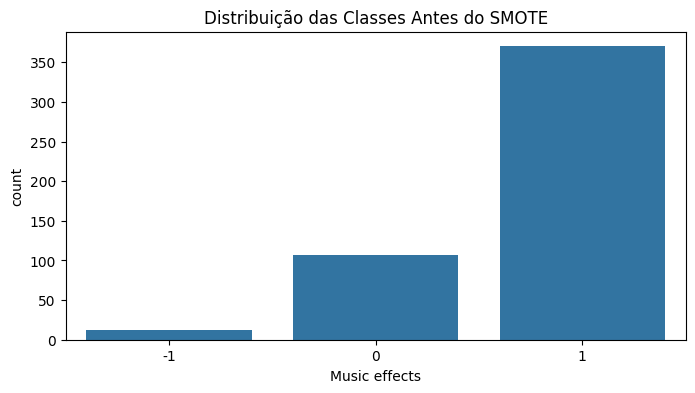

In [ ]:
# Visualização do balanço das classes antes do SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title('Distribuição das Classes Antes do SMOTE')
plt.show()


In [ ]:
# Aplicar SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


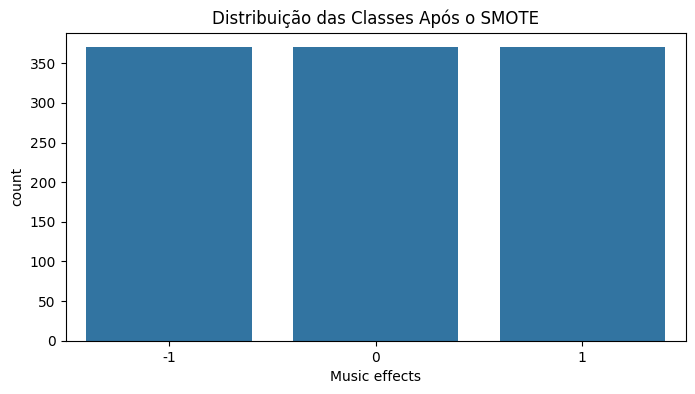

In [ ]:
# Visualização do balanço das classes após o SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribuição das Classes Após o SMOTE')
plt.show()

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# Modelagem
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  1  2]
 [ 1  4 22]
 [ 1 19 73]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.17      0.15      0.16        27
           1       0.75      0.78      0.77        93

    accuracy                           0.63       123
   macro avg       0.31      0.31      0.31       123
weighted avg       0.61      0.63      0.62       123



---------------

# **6) A análise dos efeitos da música por faixa etária**

###Essa visualização ajuda a destacar como diferentes faixas etárias respondem à música em termos de melhoria das condições mentais.

<ipython-input-98-3142de07c2dc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_effects.index, y=age_effects.values, palette="viridis")


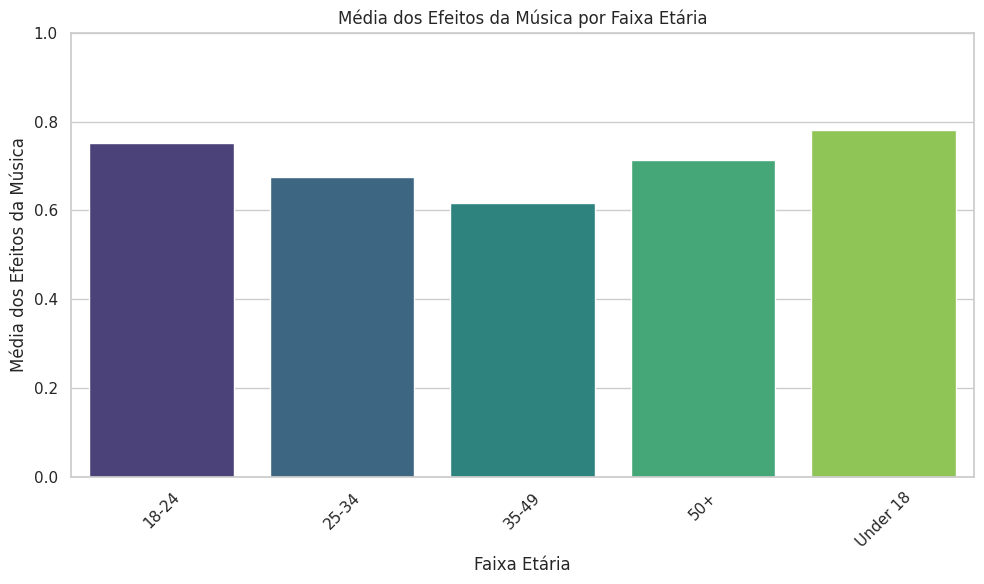

In [ ]:
# Mapear 'Music effects' para valores numéricos
data['Music effects'] = data['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})

# Calcular a média dos efeitos da música por faixa etária
age_effects = data.groupby('age_range')['Music effects'].mean()

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar uma visualização da melhoria dos efeitos da música por faixa etária
plt.figure(figsize=(10, 6))
sns.barplot(x=age_effects.index, y=age_effects.values, palette="viridis")
plt.title('Média dos Efeitos da Música por Faixa Etária')
plt.ylabel('Média dos Efeitos da Música')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

----------------

# **7) Correlação entre os estilos musicais com a melhoria na condição mental**

##O gráfico acima mostra a correlação entre a frequência dos estilos musicais e a melhoria na condição mental dos ouvintes.

<ipython-input-99-2113e7cd6279>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")


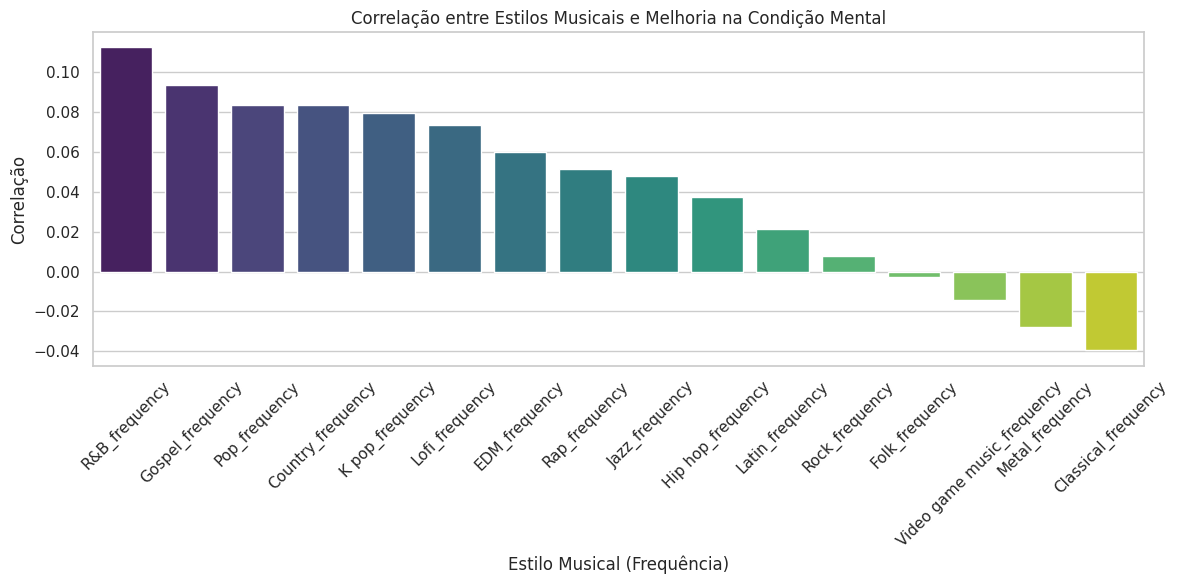

In [ ]:

# Selecionar colunas relacionadas a frequência dos estilos musicais
style_columns = [col for col in data.columns if 'frequency' in col]

# Calcular a correlação entre a melhoria da condição mental e a frequência dos estilos musicais
correlations = data[style_columns + ['Music effects']].corr()['Music effects'].drop('Music effects').sort_values(ascending=False)

# Visualizar as correlações
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.title('Correlação entre Estilos Musicais e Melhoria na Condição Mental')
plt.ylabel('Correlação')
plt.xlabel('Estilo Musical (Frequência)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

------------------------------